In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
latent_dim = 100
hidden_dim = 256
image_dim = 28 * 28
batch_size = 64
learning_rate = 0.0002
num_epochs = 50

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 54970840.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1546834.38it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13606486.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2351046.37it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, image_dim),
            nn.Tanh()
        )
 
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 1, 28, 28)
        return img


In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_dim, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
 
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity


In [6]:
generator = Generator()
discriminator = Discriminator()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)
 
# Loss function
adversarial_loss = nn.BCELoss()


In [7]:
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):
        valid = torch.ones(imgs.size(0), 1)
        fake = torch.zeros(imgs.size(0), 1)
 
        real_imgs = imgs
 
        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), latent_dim)
        gen_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()
 
        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()
 
    print(f'Epoch {epoch + 1}/{num_epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')


Epoch 1/50, D Loss: 0.022242479026317596, G Loss: 3.623379707336426
Epoch 2/50, D Loss: 0.0778350904583931, G Loss: 3.513376474380493
Epoch 3/50, D Loss: 0.2223629653453827, G Loss: 2.5282363891601562
Epoch 4/50, D Loss: 0.2401762455701828, G Loss: 3.3728530406951904
Epoch 5/50, D Loss: 0.14493440091609955, G Loss: 3.3269128799438477
Epoch 6/50, D Loss: 0.137038454413414, G Loss: 3.115438461303711
Epoch 7/50, D Loss: 0.01747024804353714, G Loss: 5.636122703552246
Epoch 8/50, D Loss: 0.03159302473068237, G Loss: 4.511980056762695
Epoch 9/50, D Loss: 0.2517545223236084, G Loss: 5.700190544128418
Epoch 10/50, D Loss: 0.13186654448509216, G Loss: 2.936033010482788
Epoch 11/50, D Loss: 0.3176342248916626, G Loss: 1.9788159132003784
Epoch 12/50, D Loss: 0.09556079655885696, G Loss: 3.7738282680511475
Epoch 13/50, D Loss: 0.12975814938545227, G Loss: 3.9859519004821777
Epoch 14/50, D Loss: 0.15420770645141602, G Loss: 4.719261646270752
Epoch 15/50, D Loss: 0.30905258655548096, G Loss: 3.55283

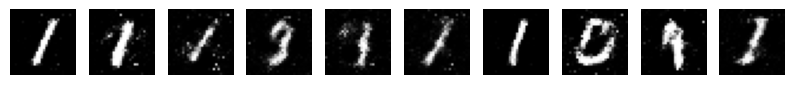

In [8]:
def generate_images(generator, num_images, latent_dim):
    # Menentukan status generator menjadi evaluation mode
    generator.eval()
 
    # Generate random noise
    z = torch.randn(num_images, latent_dim)
 
    # Generate images from noise
    gen_imgs = generator(z)
 
    # Rescale images menjadi rentang [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5
 
    # Plot the generated images
    fig, axs = plt.subplots(1, num_images, figsize=(num_images, 1))
    for i in range(num_images):
        axs[i].imshow(gen_imgs[i].detach().numpy().squeeze(), cmap='gray')
        axs[i].axis('off')
    plt.show()
 
# Generate dan menampilkan 10 gambar baru
generate_images(generator, 10, latent_dim)
